# RMSProp Optimizer low level로 구현하기

### 아래와 같은 Rosenbrock(르젠브록 함수)를 사용해 최적해를 찾아가는 Optimizer를 시험해 보려한다.


​
${\displaystyle f(x,y)=(1-x)^{2}+100(y-x^{2})^{2}}$
​

![Imgur](https://i.imgur.com/qMRFEAZ.png) 

In [0]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

### 먼저 rosenbrock에서 grid search를 사용하여 최소값을 찾는다.

In [0]:
def rosenbrock (x, y):
    return (1-x) ** 2 + 100*(y - x**2) ** 2


# start point : x:-3, y:-2 에서 시작합니다.  
start_x, start_y = -3., -2.
start_z = rosenbrock(start_x, start_y)
start_xy = tf.constant([start_x, start_y])

# xy coordinate with z : 좌표 grid 을 생성합니다.
x, y = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1, 0.01))
z = rosenbrock(x, y)


# find minimum z : rosenbrock 에서 최소값을 찾습니다.
index = np.argmin(np.ravel(z))
min_x, min_y, min_z = list(map(lambda k: np.ravel(k)[index], [x, y, z]))

print(min_x, min_y, min_z)

0.9900000000000018 0.9800000000000018 0.00010099999999999995


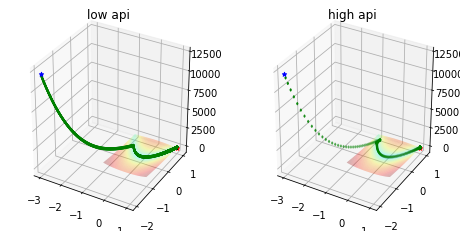

In [0]:
lr = 0.01
esp = 1e-10
beta = 0.9

# RMSProp 을 구현해 주세요.# 
xy = tf.Variable(initial_value=start_xy, dtype=tf.float32, name='xy')

#이동값
g = tf.Variable(tf.constant(value = [0.,0.]))

grad_xy = tf.gradients(rosenbrock(xy[0],xy[1]), xy)[0]

##RMSProp Optimizer############################################
G_assign = tf.assign(g, (beta * g) + (grad_xy**2))            #
step = tf.assign_sub(xy, (lr/tf.sqrt(G_assign+esp)) * grad_xy)#
###############################################################

step_api = tf.train.RMSPropOptimizer(learning_rate=lr,
                                     momentum = 0.9, epsilon = esp)\
                                    .minimize(rosenbrock(xy[0],xy[1]))

# 시각화
steps = [step, step_api] 
titles = ['low api', 'high api'] 
fig = plt.figure(figsize=plt.figaspect(0.5))
for ind in range(2):
    ax = fig.add_subplot(1,2,ind+1,projection='3d')
    # plot start point 
    ax.plot_surface(x, y, z, cmap=plt.cm.jet, alpha=0.3, norm=LogNorm())
    ax.scatter(xs=min_x, ys=min_y, marker='*', color='r')
    ax.scatter(xs=start_x, ys=start_y, zs=rosenbrock(-3, -2),
                                            marker='*', color='b')

    # Session
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    xy_history = []
    g_history = []
    for i in range(15000):
        _, xy_, g_ = sess.run([steps[ind], xy, g])
        xy_history.append(xy_)
        g_history.append(g_)
    xy_history = np.stack(xy_history, axis=0)
    ax.scatter(xs=xy_history[:, 0],
               ys=xy_history[:, 1],
               zs=rosenbrock(xy_history[:, 0], xy_history[:, 1]),
               marker='d', color='g', s=3)
    ax.set_title(titles[ind])
plt.show()